<a href="https://colab.research.google.com/github/polishPKM/FoDS_FinalProject_GPStoreReview/blob/main/FODS_data_review_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import ast
import re
import os
import nltk
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import RandomizedSearchCV,train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn import metrics
from sklearn.svm import SVC 
from sklearn import tree

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings(action='ignore')
import seaborn as sn
%matplotlib inline

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving reviews.csv to reviews.csv


In [ ]:
df = pd.read_csv('/content/reviews.csv')
df = df[df['score'].notnull()]
df.shape

(6469, 12)

In [ ]:
df.head(2)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,133c8b2e-e8c1-48ff-ac05-0208c96d12c3,Lloyd Lian,https://play-lh.googleusercontent.com/a/AEdFTp...,I really want to play the game. But the contro...,1,2,1.0.3,2022-09-23 13:38:04,NaN,NaN,newest,jp.co.spike_chunsoft.DR1
1,092311a0-9c51-4aec-adc4-c20b16bfedee,Gabby v s,https://play-lh.googleusercontent.com/a-/AD5-W...,This game was amazing till I got to the point ...,1,4,1.0.3,2022-07-31 13:54:11,NaN,NaN,newest,jp.co.spike_chunsoft.DR1


In [ ]:
df['score'].value_counts()


5    1639
4    1320
1    1297
2    1231
3     982
Name: score, dtype: int64

In [ ]:
df.isnull().sum()


reviewId                   0
userName                   0
userImage                  0
content                    1
score                      0
thumbsUpCount              0
reviewCreatedVersion    1605
at                         0
replyContent            5530
repliedAt               5530
sortOrder                  0
appId                      0
dtype: int64

In [ ]:
use_df = df[['reviewId', 'userName','content', 'score']]
use_df.head()

,reviewId,userName,content,score
0,133c8b2e-e8c1-48ff-ac05-0208c96d12c3,Lloyd Lian,I really want to play the game. But the contro...,1
1,092311a0-9c51-4aec-adc4-c20b16bfedee,Gabby v s,This game was amazing till I got to the point ...,1
2,4c2b7ce8-f0e1-4740-a996-3b2010e5181e,Andrej Zivojinovic (Extraordinare),Will not even start. All I see is Spike Chunso...,1
3,b21bcdf9-53ac-48f3-820c-877ae93bfb99,Eri Chan,Currently I haven't gotten to play the game si...,1
4,9b6d66ae-223c-4974-987e-821389d06ed4,izuku midoriya,I can't even open the app. Trifling.,1


**Cleaning texts from unecessary emojis and characters**
---



In [ ]:
df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,133c8b2e-e8c1-48ff-ac05-0208c96d12c3,Lloyd Lian,https://play-lh.googleusercontent.com/a/AEdFTp...,I really want to play the game. But the contro...,1,2,1.0.3,2022-09-23 13:38:04,nan,nan,newest,jp.co.spike_chunsoft.DR1
1,092311a0-9c51-4aec-adc4-c20b16bfedee,Gabby v s,https://play-lh.googleusercontent.com/a-/AD5-W...,This game was amazing till I got to the point ...,1,4,1.0.3,2022-07-31 13:54:11,nan,nan,newest,jp.co.spike_chunsoft.DR1
2,4c2b7ce8-f0e1-4740-a996-3b2010e5181e,Andrej Zivojinovic (Extraordinare),https://play-lh.googleusercontent.com/a/AEdFTp...,Will not even start. All I see is Spike Chunso...,1,10,1.0.3,2022-07-27 16:42:51,nan,nan,newest,jp.co.spike_chunsoft.DR1
3,b21bcdf9-53ac-48f3-820c-877ae93bfb99,Eri Chan,https://play-lh.googleusercontent.com/a-/AD5-W...,Currently I haven't gotten to play the game si...,1,0,nan,2022-06-20 00:15:33,nan,nan,newest,jp.co.spike_chunsoft.DR1
4,9b6d66ae-223c-4974-987e-821389d06ed4,izuku midoriya,https://play-lh.googleusercontent.com/a-/AD5-W...,I can't even open the app. Trifling.,1,0,1.0.2,2022-03-05 05:39:32,nan,nan,newest,jp.co.spike_chunsoft.DR1
...,...,...,...,...,...,...,...,...,...,...,...,...
6464,6d79099d-9a78-49ae-889a-bf368867a48d,John James noval Morgado,https://play-lh.googleusercontent.com/a/AEdFTp...,best game ever first try victory on cure mode,5,0,nan,2022-11-30 01:58:55,nan,nan,newest,com.miniclip.plagueinc
6465,40c7743f-7ba6-46da-bd7c-c55d02d69904,Rich,https://play-lh.googleusercontent.com/a-/AD5-W...,I've just destroyed humanity,5,0,1.19.10,2022-11-29 22:47:12,nan,nan,newest,com.miniclip.plagueinc
6466,d778a3c8-8293-422e-b976-7e9276c77d6f,reaper playz,https://play-lh.googleusercontent.com/a-/AD5-W...,fun,5,0,1.19.10,2022-11-29 20:30:21,nan,nan,newest,com.miniclip.plagueinc
6467,9adc52a7-c817-4b43-858c-2a1b2329dd72,Tina Akins,https://play-lh.googleusercontent.com/a-/AD5-W...,Want to feel chills at night? Neither did I.,5,0,1.19.10,2022-11-29 18:56:05,nan,nan,newest,com.miniclip.plagueinc


In [ ]:
df_clean = use_df[(use_df['content']!=' ')&(use_df['content']!='')]
df_clean.shape,use_df.shape

((6469, 4), (6469, 4))

In [ ]:
df_clean['reviewId'] = df['reviewId'].fillna(0)
df_clean['content'] = df['content'].fillna('Asiap')
df_clean['score'] = df['score'].fillna(0)


**Word Level Analysis**

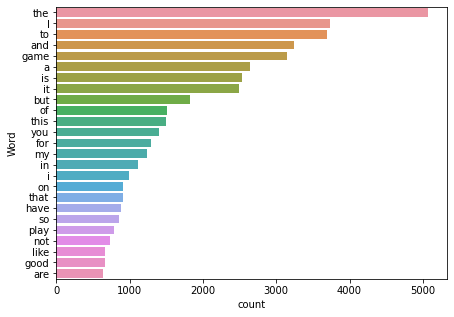

In [ ]:
def showmostfrequentwords(text,no_of_words):
    
    allwords = ' '.join([char for char in text])
    allwords = allwords.split()
    

    fdist = nltk.FreqDist(allwords)
    
    wordsdf = pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    
    df = wordsdf.nlargest(columns="count",n = no_of_words)
    
    plt.figure(figsize=(7,5))
    ax = sn.barplot(data=df,x = 'count',y = 'word')
    ax.set(ylabel = 'Word')
    plt.show()
    
    return wordsdf
    
wordsdf = showmostfrequentwords(df_clean['content'],25)

**Removal of Stopwords**

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


def removestopwords(text):
    
    
    removedstopword = [word for word in text.split() if word not in stop_words]
    return ' '.join(removedstopword)

df_clean['content'] = df_clean['content'].apply(lambda x:removestopwords(x))
df_clean['content'].iloc[1]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'This game amazing till I got point summary climax class trials evidence last class trial class trial evidence I need current class trial summarize information I need anymore information I need have.'

**Lemmatizing the words**

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemma=WordNetLemmatizer()

def lematizing(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = lemma.lemmatize(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

df_clean['content'] = df_clean['content'].apply(lambda x:removestopwords(x))
df_clean['content'].iloc[1]

[nltk_data] Downloading package wordnet to /root/nltk_data...


'This game amazing till I got point summary climax class trials evidence last class trial class trial evidence I need current class trial summarize information I need anymore information I need have.'

**Stemming Texts**

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming(sentence):
    
    stemmed_sentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemmed_sentence+=stem
        stemmed_sentence+=" "
        
    stemmed_sentence = stemmed_sentence.strip()
    return stemmed_sentence
df_clean['content'] = df_clean['content'].apply(lambda x:removestopwords(x))
df_clean['content'].iloc[1]

'This game amazing till I got point summary climax class trials evidence last class trial class trial evidence I need current class trial summarize information I need anymore information I need have.'

**Using Count-Vectorizer**

In [ ]:

data = df_clean[['reviewId', 'content', 'score']]

count_vec = CountVectorizer(max_df=0.90,min_df=2,
                           max_features=1000,stop_words='english')

bagofword_vec = count_vec.fit_transform(data['content'])
bagofword_vec

<6469x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 44407 stored elements in Compressed Sparse Row format>

In [ ]:
test = df_clean['score']
X_train, X_test, y_train, y_test = train_test_split(bagofword_vec,test,
                                                    test_size=0.2)
X_train.shape,X_test.shape

((5175, 1000), (1294, 1000))

In [ ]:
mb = MultinomialNB()
mb.fit(X_train,y_train)
mbpred = mb.predict(X_test)
print(metrics.accuracy_score(y_test,mbpred))

0.3979907264296754


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print(metrics.accuracy_score(y_test,rf_pred))

0.38871715610510044


**USING TF-IDF**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data = df_clean[['reviewId', 'content', 'score']]

y=data['score']

X_train,X_test,y_train,y_test = train_test_split(df_clean['content']
                                                ,y,test_size=0.2,
                                                random_state=557)

X_train.shape,X_test.shape

((5175,), (1294,))

In [ ]:
#performing the TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
xtrain_tfidf = tfidf_vectorizer.fit_transform(X_train.values.astype('U'))
xtest_tfidf = tfidf_vectorizer.transform(X_test.values.astype('U'))

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(xtrain_tfidf,y_train)
dtree_pred = dtree.predict(xtest_tfidf)
metrics.accuracy_score(y_test,dtree_pred)

0.34698608964451316

In [ ]:
rf = RandomForestClassifier()
rf.fit(xtrain_tfidf,y_train)
rf_pred = rf.predict(xtest_tfidf)
metrics.accuracy_score(y_test,rf_pred)

0.41576506955177744

In [ ]:
lr = LogisticRegression()
lr.fit(xtrain_tfidf,y_train)
lr_pred = lr.predict(xtest_tfidf)
metrics.accuracy_score(y_test,lr_pred)

0.42890262751159197

**Using TF-IDF X NFM**



*   NFM is very efficient method to select the most vital information in  the training model. 
*   We using the NFM in the following steps:
  *   Converting the raw texts into Vectors using TF-IDF vectorizer.
  *   Converting Vectors to NFM forms, splitting the matrix of NXM into NXP and PXM.
  *   N = total numbers of sentences, P = numbers of the topics, M = numbers of terms in each sentences.
  *   Number of topics and n_iter, can be tuned using GridSearch and RandomizedSearch.
  *   This would be using n_topics as 5 and n_iters as 500, can be changed according to needs.











In [ ]:
text = list(df_clean['content'])
print(len(text))

6469


In [ ]:
vec = TfidfVectorizer()
tfd = vec.fit_transform(text)

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
num_topics = 5
nmf = NMF(n_components=num_topics, random_state=50, max_iter=500)

In [ ]:
W1 = nmf.fit_transform(tfd)
H1 = nmf.components_

In [ ]:
df_new = pd.DataFrame({'text':text, 'label':[np.argmax(i) for i in W1]})
df_new

,text,label
0,I really want play game. But control utterly a...,1
1,This game amazing till I got point summary cli...,1
2,Will even start. All I see Spike Chunsoft that...,1
3,Currently I gotten play game since everytime I...,1
4,I can't even open app. Trifling.,1
...,...,...
6464,best game ever first try victory cure mode,1
6465,I've destroyed humanity,1
6466,fun🗿,3
6467,Want feel chills night? Neither I.,1


In [ ]:
train,test = train_test_split(df_new, train_size=0.7, random_state=25, stratify=df_new.label)

X_train = train.text
y_train = train.label

X_test = test.text
y_test = test.label

In [ ]:
vec = TfidfVectorizer()
X_train_tfidf = vec.fit_transform(X_train)
X_test_tfidf = vec.transform(X_test)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_tfidf,y_train)
dt_pred = dt.predict(X_test_tfidf)
print(metrics.classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.68      0.97      0.80       243
           1       0.97      0.88      0.93      1335
           2       0.97      0.98      0.98        62
           3       0.86      0.90      0.88       167
           4       0.80      0.85      0.83       134

    accuracy                           0.90      1941
   macro avg       0.86      0.92      0.88      1941
weighted avg       0.91      0.90      0.90      1941



In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)
rf_pred = rf.predict(X_test_tfidf)
print(metrics.classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.70      0.88      0.78       243
           1       0.93      0.93      0.93      1335
           2       1.00      0.89      0.94        62
           3       0.92      0.78      0.84       167
           4       0.94      0.70      0.80       134

    accuracy                           0.90      1941
   macro avg       0.90      0.84      0.86      1941
weighted avg       0.90      0.90      0.90      1941

